<a href="https://colab.research.google.com/github/EmoreiraV/DPIP/blob/main/StatisticsModel_week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Modelling in Python

This week we will be covering the Python library for fitting statistical models to data using [statsmodels](https://www.statsmodels.org/stable/index.html). Statmodels is quite good for fitting simple models and getting similar models to R, but generally I think next week's Machine Learning version of the same kind of methods are more widely useful. Statsmodels can be useful for things like PDFs, CDFs and hypothesis testing.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Distributions

Let's start by firstly looking at some distributions. Let's have a look at how many goals Liverpool have scored in Premier League football matches this season

In [ ]:
goals = np.array([3, 2, 1, 3, 3, 3, 2, 5, 5, 2, 2, 4, 4])


Let's start by using some of our knowledge from last week to create a barplot of the data.

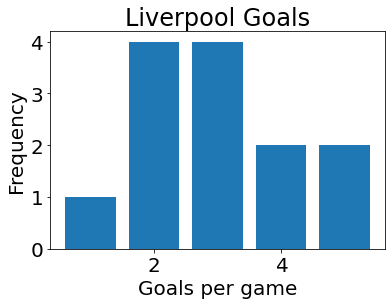

In [ ]:
(unique, counts) = np.unique(goals, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Goals per game')
plt.ylabel('Frequency')
plt.title('Liverpool Goals')
plt.show()

Based on looking at the data and what we know from basic information about football, this data is positive integars. Technically there is an upper limit, its only physically possible to score so many goals in a match with the time available, but its not really relevant for this problem.

Let's find the maximum likelihood estimate for a Poisson distribution...

In [ ]:
stats.poisson.fit(goals)

AttributeError: ignored

For some reason this doesn't work. It turns out that for whatever reason poisson doesn't have a fit method that works like other methods. So let's use a bit of statistics knowledge to work out out the Poisson distribution parameter. Well it turns out that $\lambda$ is just the mean. Also note that we can't use 'lambda' as the name of our parameter.

In [ ]:
rate = goals.mean()
rate

3.0

Let's plot the theoretical probability mass function (pmf)

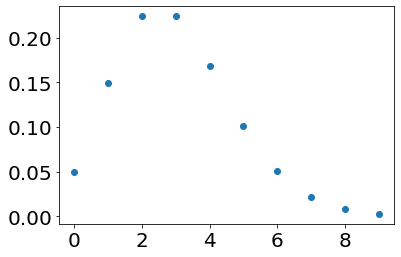

In [ ]:
x = list(range(10))
y = [stats.poisson.pmf(i,rate) for i in range(10)]

plt.plot(x,y, 'o')
plt.show()

## Testing

Let's start by generating some data uning statsmodels

In [ ]:
rvs1 = stats.norm.rvs(loc=6, scale=5, size=500)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500)

Let's use Python to do an t-test now

In [ ]:
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=0.19936063996162215, pvalue=0.8420212568451464)

and then a Welch t-test which doesn't assume proportion variances

In [ ]:
stats.ttest_ind(rvs1, rvs2, equal_var=False)

Ttest_indResult(statistic=0.19936063996162215, pvalue=0.8420355212142344)

If you run the above multiple times then you will see some interesting results.

## Cubic Regression

Let's go back to our cubic regression model from last week and fit the models properly. This is how we generated the data last time and the models I fitted by hand...

In [ ]:
# this is the section for generating the data
beta = [1,-1,-0.1,0.1]
x = np.linspace(-5, 5, 200)
y_true = beta[0] * 1 + beta[1] * x + beta[2] * x**2 + beta[3] * x**3
y = y_true + np.random.normal(0,1,200)

In [ ]:
# this is where I fitted the models by hand
beta_intercept = [0]
y_intercept_predict = beta_intercept[0] * np.array([1 for i in range(len(x))])
beta_linear = [0, 1]
y_linear_predict = beta_linear[0] * np.array([1 for i in range(len(x))]) + beta_linear[1] * x
beta_quadratic = [-5, 0.1, 0.5]
y_quadratic_predict = beta_quadratic[0] * np.array([1 for i in range(len(x))]) + beta_quadratic[1] * x + beta_quadratic[2] * x**2
beta_cubic = [1,-1,-0.1,0.1]
y_cubic_predict = beta_cubic[0] * 1 + beta_cubic[1] * x + beta_cubic[2] * x**2 + beta_cubic[3] * x**3

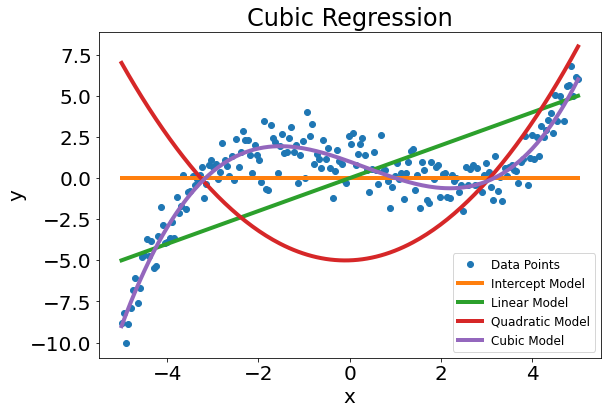

In [ ]:
# Figure size
plt.figure(figsize=[9,6])
# font size
plt.rcParams.update({'font.size': 20})
plt.rc('legend', fontsize=12)
# plot the data
line_width = 4
plt.plot(x, y, 'o', label='Data Points')
plt.plot(x, y_intercept_predict, linewidth=line_width, label='Intercept Model')
plt.plot(x, y_linear_predict, linewidth=line_width, label='Linear Model')
plt.plot(x, y_quadratic_predict, linewidth=line_width, label='Quadratic Model')
plt.plot(x, y_cubic_predict, linewidth=line_width, label='Cubic Model')
# add axes titles
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Regression')
# add legend
plt.legend()
# show plot
plt.show()

Let's try and fit some regression models, however the first thing we need to do is get the data into the correct format

In [ ]:
X_intercept = np.ones(200)
X_linear = np.stack((np.ones(200), x), axis=1)
X_quadratic = np.stack((np.ones(200), x, x**2), axis=1)
X_cubic = np.stack((np.ones(200), x, x**2, x**3), axis=1)

Let's fit our regression models now

In [ ]:
import statsmodels.api as sm
# intercept model
model_intercept = sm.OLS(y, X_intercept)
results_intercept = model_intercept.fit()
# linear model
model_linear = sm.OLS(y, X_linear)
results_linear = model_linear.fit()
# quadratic model
model_quadratic = sm.OLS(y, X_quadratic)
results_quadratic = model_quadratic.fit()
# cubic model
model_cubic = sm.OLS(y, X_cubic)
results_cubic = model_cubic.fit()

We can print summaries if we want. Note that using 'print' here actually helps a lot with the format of the results

In [ ]:
#results_intercept.summary()
#results_linear.summary()
#results_quadratic.summary()
print(results_cubic.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     537.2
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           2.94e-94
Time:                        14:25:08   Log-Likelihood:                -258.49
No. Observations:                 200   AIC:                             525.0
Df Residuals:                     196   BIC:                             538.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8992      0.094      9.524      0.0

Let's do some predictions and then plot the proper results and see how good or bad I did before!

In [ ]:
predict_intercept = results_intercept.predict(X_intercept)
predict_linear = results_linear.predict(X_linear)
predict_quadratic = results_quadratic.predict(X_quadratic)
predict_cubic = results_cubic.predict(X_cubic)

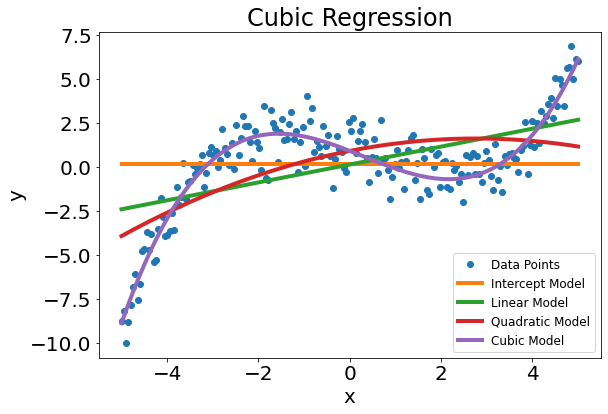

In [ ]:
# Figure size
plt.figure(figsize=[9,6])
# font size
plt.rcParams.update({'font.size': 20})
plt.rc('legend', fontsize=12)
# plot the data
line_width = 4
plt.plot(x, y, 'o', label='Data Points')
plt.plot(x, predict_intercept, linewidth=line_width, label='Intercept Model')
plt.plot(x, predict_linear, linewidth=line_width, label='Linear Model')
plt.plot(x, predict_quadratic, linewidth=line_width, label='Quadratic Model')
plt.plot(x, predict_cubic, linewidth=line_width, label='Cubic Model')
# add axes titles
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Regression')
# add legend
plt.legend()
# show plot
plt.show()

So I was quite a way out on the quadratic model it seems and not the best at the linear model

## Using R in Python

Lets try and fit this data with a Gaussian Process using mgcv from R but still within Python

In [ ]:
from rpy2.robjects import r
from rpy2.robjects import globalenv
from rpy2.robjects import pandas2ri
pandas2ri.activate() # Activate automatic conversion to/from Pandas
globalenv["r_x"] = x # make x available in R
globalenv["r_y"] = y # make y available in R
preds = r("""
library(mgcv)
model <- gam(r_y ~ s(r_x, bs = "gp", k = 50))
plot(model)
p <- predict(model, se.fit=T)
cbind(p$fit, p$fit - (2 * p$se.fit), p$fit + (2 * p$se.fit))
""")


Lets add the mean of the Gaussian Process

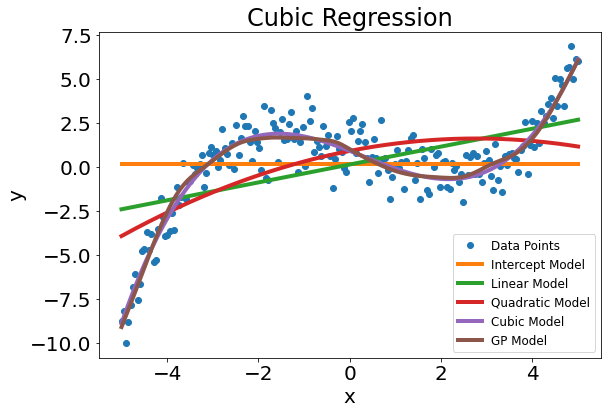

In [ ]:
# Figure size
plt.figure(figsize=[9,6])
# font size
plt.rcParams.update({'font.size': 20})
plt.rc('legend', fontsize=12)
# plot the data
line_width = 4
plt.plot(x, y, 'o', label='Data Points')
plt.plot(x, predict_intercept, linewidth=line_width, label='Intercept Model')
plt.plot(x, predict_linear, linewidth=line_width, label='Linear Model')
plt.plot(x, predict_quadratic, linewidth=line_width, label='Quadratic Model')
plt.plot(x, predict_cubic, linewidth=line_width, label='Cubic Model')
plt.plot(x,preds[:,0], linewidth=line_width, label='GP Model')
# add axes titles
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Regression')
# add legend
plt.legend()
# show plot
plt.show()

Now let's just plot the Gaussian Process prediction, but include the confidence interval

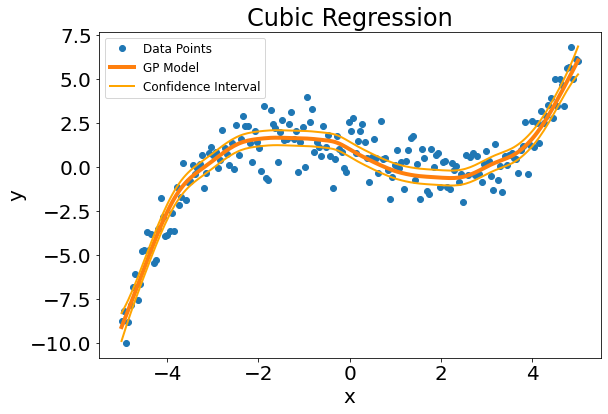

In [ ]:
# Figure size
plt.figure(figsize=[9,6])
# font size
plt.rcParams.update({'font.size': 20})
plt.rc('legend', fontsize=12)
# plot the data
line_width = 4
plt.plot(x, y, 'o', label='Data Points')
plt.plot(x,preds[:,0], linewidth=line_width, label='GP Model')
plt.plot(x,preds[:,1], color='orange', linewidth=2, label='Confidence Interval')
plt.plot(x,preds[:,2], color='orange', linewidth=2)
# add axes titles
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Regression')
# add legend
plt.legend()
# show plot
plt.show()